### Heuristic Models
Look at the Seattle weather in the **data** folder. Come up with a heuristic model to predict if it will rain today. Keep in mind this is a time series, which means that you only know what happened historically (before a given date). One example of a heuristic model is: It will rain tomorrow if it rained more than 1 inch (>1.0 PRCP) today. Describe your heuristic model in the next cell.

**your model here**  

Examples:  

If rained yesterday it will rain today.  
If it rained yesterday or the day before it will rain today.

In [2]:
#here is an example of how to build and populate a hurestic model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time
import datetime

df = pd.read_csv('https://raw.githubusercontent.com/daniel-dc-cd/data_science/master/module_4_ML/data/seattle_weather_1948-2017.csv')

numrows = 25549 # can be as large as 25549

#create an empty dataframe to hold 100 values
heuristic_df = pd.DataFrame({'yesterday':[0.0]*numrows,
                             'today':[0.0]*numrows,
                             'tomorrow':[0.0]*numrows,
                             'guess':[False]*numrows, #logical guess
                             'rain_tomorrow':[False]*numrows, #historical observation
                             'correct':[False]*numrows}) #TRUE if your guess matches the historical observation

#sort columns for convience
seq = ['yesterday','today','tomorrow','guess','rain_tomorrow','correct']
heuristic_df = heuristic_df.reindex(columns=seq)

In [3]:
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


<AxesSubplot:>

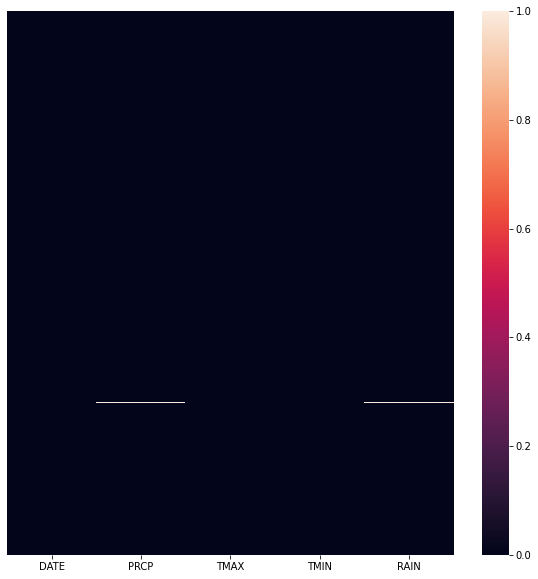

In [4]:
plt.figure(figsize=(10,10))
sns.heatmap(pd.isnull(df),yticklabels=False)

In [5]:
df[pd.isnull(df['PRCP'])]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [6]:
df[pd.isnull(df['RAIN'])]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


<AxesSubplot:xlabel='RAIN', ylabel='count'>

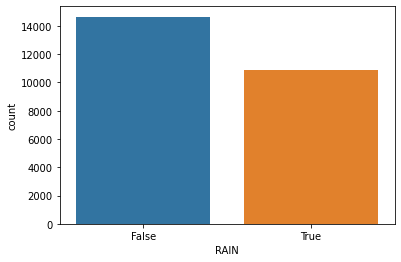

In [7]:
sns.countplot(data=df, x='RAIN')

In [8]:
df['PRCP'].mean()

0.10622162204477956

In [9]:
def RAIN_INSERTION(cols):
    RAIN=cols[0]
    if pd.isnull(RAIN):
        return 'False'
    else:
        return RAIN

In [10]:
def PRCP_INSERTION(col):
    PRCP=col[0]
    if pd.isnull(PRCP):
        return df['PRCP'].mean()
    else:
        return PRCP

In [11]:
df['RAIN']=df[['RAIN']].apply(RAIN_INSERTION,axis=1)

In [12]:
df['PRCP']=df[['PRCP']].apply(PRCP_INSERTION,axis=1)

In [13]:
df[pd.isnull(df['RAIN'])]

,DATE,PRCP,TMAX,TMIN,RAIN


In [14]:
df[pd.isnull(df['PRCP'])]

,DATE,PRCP,TMAX,TMIN,RAIN


## EDA

Text(0.5, 1.0, 'Precipitation Vs Minimum Temperature')

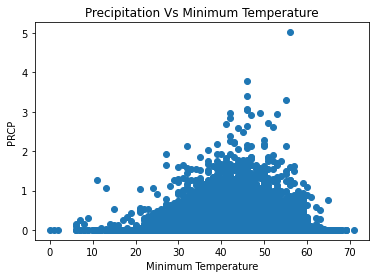

In [15]:
plt.scatter(x='TMIN',y='PRCP',data=df)
plt.xlabel('Minimum Temperature')
plt.ylabel('PRCP')
plt.title('Precipitation Vs Minimum Temperature')

Text(0.5, 1.0, 'Precipitation Vs Maximum Temperature')

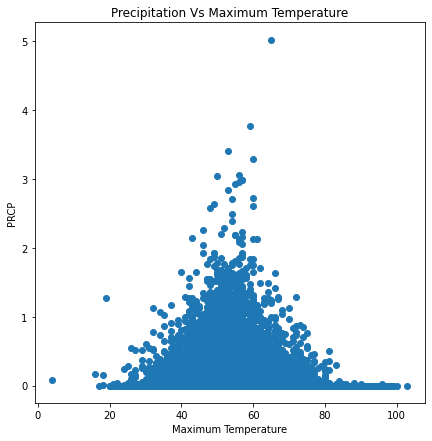

In [16]:
plt.figure(figsize=(7,7))
plt.scatter(x='TMAX',y='PRCP',data=df)
plt.xlabel('Maximum Temperature')
plt.ylabel('PRCP')
plt.title('Precipitation Vs Maximum Temperature')


/Users/saraabdulrahman/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TMIN', ylabel='Density'>

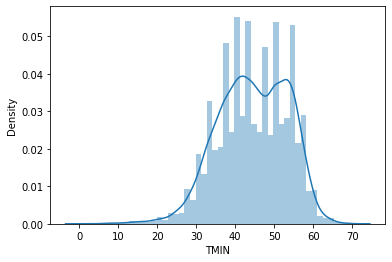

In [17]:
sns.distplot(df['TMIN'])

/Users/saraabdulrahman/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TMAX', ylabel='Density'>

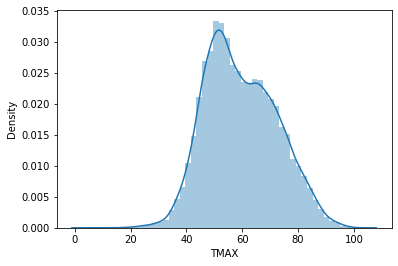

In [18]:
sns.distplot(df['TMAX'])

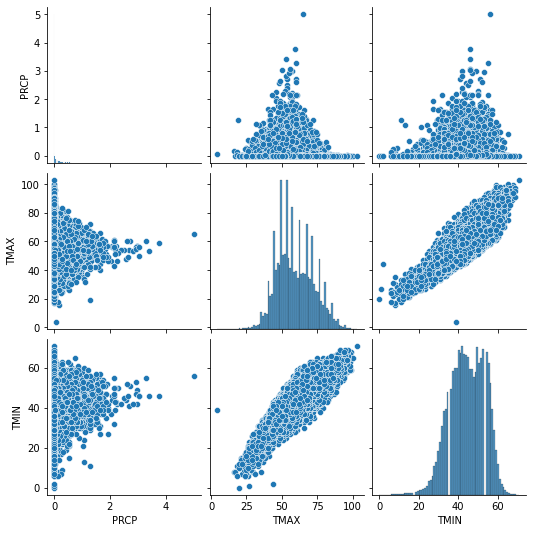

In [19]:
sns.pairplot(data=df)

<AxesSubplot:>

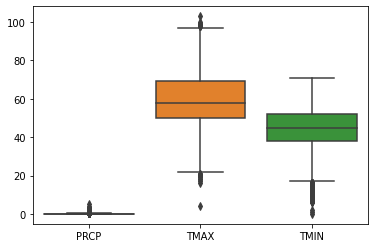

In [20]:
#plt.figure(figsize=(10,7))
sns.boxplot(data=df)

In [21]:
#Dropping the outliers from TMIN column
df=df.drop(df[df['TMIN']<17 ].index)


In [22]:
#Dropping the outliers from TMAX columns i.e. the value more than 100
df=df.drop(df[(df['TMAX']>97.5) | (df['TMAX']< 21.5)].index)


In [23]:
#Dropping the outliers from PRCP columns i.e. the value more than 0.275
df=df.drop(df[(df['PRCP']>0.25) | (df['PRCP']< -0.15) ].index)

<AxesSubplot:>

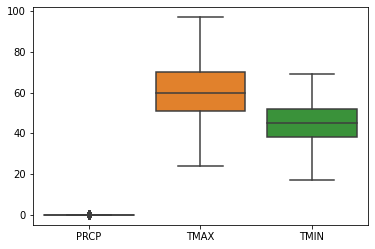

In [24]:
sns.boxplot(data=df)


In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
lr= LogisticRegression()

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X=df.drop(['RAIN','DATE'],axis=1)
y=df['RAIN']
y=y.astype('str')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [29]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
prediction=lr.predict(X_test)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
print('Confusion Matrix',confusion_matrix(y_test,prediction))
print('\n')
print('Classification Report',classification_report(y_test,prediction))

Confusion Matrix [[4405   22]
 [ 495 1646]]


Classification Report               precision    recall  f1-score   support

       False       0.90      1.00      0.94      4427
        True       0.99      0.77      0.86      2141

    accuracy                           0.92      6568
   macro avg       0.94      0.88      0.90      6568
weighted avg       0.93      0.92      0.92      6568

